## Lesson-01

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()

In [2]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
type(data['feature_names'])
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
dataframe = pd.DataFrame(data['data'])

In [5]:
dataframe.columns = data['feature_names']

In [6]:
dataframe['price'] = data['target']

In [7]:
import seaborn as sns

In [8]:
%matplotlib inline

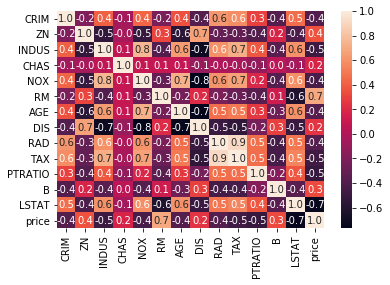

In [9]:
sns.heatmap(dataframe.corr(), annot=True, fmt='.1f')

In [10]:
import matplotlib.pyplot as plt

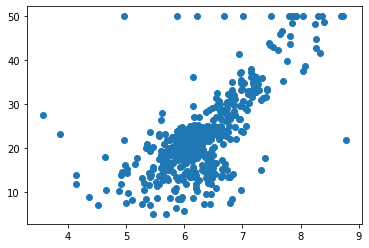

In [11]:
plt.scatter(dataframe['RM'], dataframe['price'])

In [12]:
x = dataframe['RM']

In [13]:
y = dataframe['price']

In [14]:
history_notes = {_x : _y for _x, _y in zip(x, y)}

In [15]:
history_notes[6.575]

24.0

In [16]:
similary_ys = [y for _, y in sorted(history_notes.items(), key=lambda x_y: (x_y[0] - 6.57) ** 2)[:3]]

In [17]:
import numpy as np

In [18]:
np.mean(similary_ys)

24.2

## 用历史数据来预测未曾见到的过的数据，最直接的方法

## K-Neighbor-Nearst

In [19]:
def knn(query_x, history, top_n=3):
    sorted_notes = sorted(history.items(), key=lambda x_y: (x_y[0] - query_x) ** 2) 
    similar_notes = sorted_notes[:top_n]
    similar_ys = [y for _, y in similar_notes]
    
    return np.mean(similar_ys)

In [20]:
knn(5.4, history_notes)

15.700000000000001

## 为了更快的获得结果，我们希望通过拟合函数来获得预测能力

$$ f(rm) = k * rm + b $$ 

## Random Approach

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} (\hat{y_i} - y_i) ^ 2 $$
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

In [21]:
def loss(y_hat, y):
    return np.mean((y_hat - y) ** 2)

In [22]:
import random

In [23]:
min_loss = float('inf')
best_k, bes_b = None, None

for step in range(1000):
    min_v, max_v = -100, 100
    k, b = random.randrange(min_v, max_v), random.randrange(min_v, max_v)
    y_hats = [k * rm_i  + b for rm_i in x]
    current_loss = loss(y_hats, y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = 34 * rm + -34, 此时loss是: 25043.50125836365
在第1步，我们获得了函数 f(rm) = -18 * rm + 85, 此时loss是: 2971.5503273280656
在第6步，我们获得了函数 f(rm) = 4 * rm + -22, 此时loss是: 432.56381650592937
在第33步，我们获得了函数 f(rm) = -9 * rm + 80, 此时loss是: 205.8699502114622
在第101步，我们获得了函数 f(rm) = 2 * rm + 17, 此时loss是: 117.96387863241092
在第165步，我们获得了函数 f(rm) = 4 * rm + -7, 此时loss是: 75.73575326482221
在第493步，我们获得了函数 f(rm) = 6 * rm + -10, 此时loss是: 75.12242231620554
在第572步，我们获得了函数 f(rm) = 5 * rm + -8, 此时loss是: 52.684031966403175
在第855步，我们获得了函数 f(rm) = 11 * rm + -46, 此时loss是: 45.733044835968386


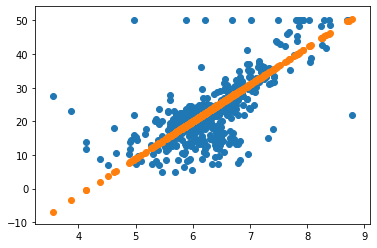

In [24]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## 蒙特卡洛模拟

## Supervisor

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

$$ \frac{\partial{loss(k, b)}}{\partial{k}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i) * rm_i $$

$$ \frac{\partial{loss(k, b)}}{\partial{b}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i)$$

In [25]:
def partial_k(k, b, x, y):
    return 2 * np.mean((k * x + b - y) * x)

def partial_b(k, b, x, y):
    return 2 * np.mean(k * x + b - y)

k, b = random.random(), random.random()
min_loss = float('inf')
best_k, bes_b = None, None
learning_rate = 1e-2

for step in range(2000):
    k, b = k + (-1 * partial_k(k, b, x, y) * learning_rate), b + (-1 * partial_b(k, b, x, y) * learning_rate)
    y_hats = k * x + b
    current_loss = loss(y_hats, y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = 2.9752348087079135 * rm + 1.0098242584596484, 此时loss是: 70.07467192865377
在第1步，我们获得了函数 f(rm) = 3.3906549734429863 * rm + 1.066318639987634, 此时loss是: 59.69741191583028
在第2步，我们获得了函数 f(rm) = 3.4667267712715253 * rm + 1.0694678568351923, 此时loss是: 59.35216437037973
在第3步，我们获得了函数 f(rm) = 3.4815615392465804 * rm + 1.0629924206149812, 此时loss是: 59.33359918044598
在第4步，我们获得了函数 f(rm) = 3.485345575166437 * rm + 1.054781871260286, 此时loss是: 59.32567547818176
在第5步，我们获得了函数 f(rm) = 3.4871351962887105 * rm + 1.0462599072473868, 此时loss是: 59.31810182116329
在第6步，我们获得了函数 f(rm) = 3.488564651173299 * rm + 1.0376834402258381, 此时loss是: 59.31054308088219
在第7步，我们获得了函数 f(rm) = 3.4899288465416163 * rm + 1.0290988305182633, 此时loss是: 59.30298834264297
在第8步，我们获得了函数 f(rm) = 3.4912809995493412 * rm + 1.020514443622384, 此时loss是: 59.29543724933248
在第9步，我们获得了函数 f(rm) = 3.4926307135080057 * rm + 1.0119317887186363, 此时loss是: 59.28788978763159
在第10步，我们获得了函数 f(rm) = 3.493979721437356 * rm + 1.0033511377378093

在第115步，我们获得了函数 f(rm) = 3.6338265385492488 * rm + 0.11376915139759487, 此时loss是: 58.50809945541442
在第116步，我们获得了函数 f(rm) = 3.6351415088060137 * rm + 0.10540447041509456, 此时loss是: 58.5009306140003
在第117步，我们获得了函数 f(rm) = 3.6364561628489045 * rm + 0.09704180090636406, 此时loss是: 58.49376521998664
在第118步，我们获得了函数 f(rm) = 3.6377705007539616 * rm + 0.08868114238769971, 此时loss是: 58.48660327171577
在第119步，我们获得了函数 f(rm) = 3.6390845225972077 * rm + 0.08032249437551423, 此时loss是: 58.47944476753052
在第120步，我们获得了函数 f(rm) = 3.6403982284546466 * rm + 0.07196585638633653, 此时loss是: 58.47228970577472
在第121步，我们获得了函数 f(rm) = 3.641711618402265 * rm + 0.0636112279368119, 此时loss是: 58.46513808479291
在第122步，我们获得了函数 f(rm) = 3.6430246925160295 * rm + 0.055258608543701675, 此时loss是: 58.45798990293057
在第123步，我们获得了函数 f(rm) = 3.644337450871889 * rm + 0.0469079977238835, 此时loss是: 58.450845158533824
在第124步，我们获得了函数 f(rm) = 3.6456498935457753 * rm + 0.03855939499435133, 此时loss是: 58.44370384994963
在第125步，我们获得了函数 f(rm) = 3.64696202

在第250步，我们获得了函数 f(rm) = 3.8085176201929767 * rm + -0.9974614341767631, 此时loss是: 57.570833246737195
在第251步，我们获得了函数 f(rm) = 3.809790582089915 * rm + -1.0055588950250132, 此时loss是: 57.564115124177384
在第252步，我们获得了函数 f(rm) = 3.8110632378748246 * rm + -1.013654408658524, 此时loss是: 57.55740023227338
在第253步，我们获得了函数 f(rm) = 3.812335587621317 * rm + -1.0217479755455467, 此时loss是: 57.550688569471596
在第254步，我们获得了函数 f(rm) = 3.813607631402985 * rm + -1.02983959615422, 此时loss是: 57.54398013421917
在第255步，我们获得了函数 f(rm) = 3.8148793692934064 * rm + -1.0379292709525696, 此时loss是: 57.53727492496409
在第256步，我们获得了函数 f(rm) = 3.8161508013661383 * rm + -1.0460170004085088, 此时loss是: 57.53057294015491
在第257步，我们获得了函数 f(rm) = 3.817421927694722 * rm + -1.0541027849898388, 此时loss是: 57.52387417824107
在第258步，我们获得了函数 f(rm) = 3.81869274835268 * rm + -1.0621866251642478, 此时loss是: 57.51717863767278
在第259步，我们获得了函数 f(rm) = 3.8199632634135177 * rm + -1.070268521399312, 此时loss是: 57.510486316900845
在第260步，我们获得了函数 f(rm) = 3.82123347295

在第393步，我们获得了函数 f(rm) = 3.9874780490699933 * rm + -2.1358498413263685, 此时loss是: 56.64221352758108
在第394步，我们获得了函数 f(rm) = 3.988707975947512 * rm + -2.143673551337541, 此时loss是: 56.635941965893785
在第395步，我们获得了函数 f(rm) = 3.98993760706173 * rm + -2.1514953799634577, 此时loss是: 56.62967342011699
在第396步，我们获得了函数 f(rm) = 3.9911669424837712 * rm + -2.1593153276565396, 此时loss是: 56.62340788880064
在第397步，我们获得了函数 f(rm) = 3.9923959822847404 * rm + -2.1671333948690985, 此时loss是: 56.617145370494896
在第398步，我们获得了函数 f(rm) = 3.9936247265357263 * rm + -2.174949582053338, 此时loss是: 56.610885863750966
在第399步，我们获得了函数 f(rm) = 3.994853175307801 * rm + -2.1827638896613535, 此时loss是: 56.60462936712056
在第400步，我们获得了函数 f(rm) = 3.9960813286720196 * rm + -2.19057631814513, 此时loss是: 56.59837587915618
在第401步，我们获得了函数 f(rm) = 3.997309186699418 * rm + -2.198386867956545, 此时loss是: 56.59212539841094
在第402步，我们获得了函数 f(rm) = 3.998536749461018 * rm + -2.2061955395473674, 此时loss是: 56.585877923438794
在第403步，我们获得了函数 f(rm) = 3.999764017027

在第534步，我们获得了函数 f(rm) = 4.1580108121561645 * rm + -3.2206288718342657, 此时loss是: 55.7870379856365
在第535步，我们获得了函数 f(rm) = 4.159199730634133 * rm + -3.2281917225765095, 此时loss是: 55.78117766649362
在第536步，我们获得了函数 f(rm) = 4.160388363210183 * rm + -3.2357527546629163, 此时loss是: 55.775320165500396
在第537步，我们获得了函数 f(rm) = 4.161576709953067 * rm + -3.2433119685308225, 此时loss是: 55.769465481301374
在第538步，我们获得了函数 f(rm) = 4.1627647709315205 * rm + -3.250869364617459, 此时loss是: 55.763613612542194
在第539步，我们获得了函数 f(rm) = 4.1639525462142615 * rm + -3.258424943359952, 此时loss是: 55.75776455786884
在第540步，我们获得了函数 f(rm) = 4.165140035869991 * rm + -3.2659787051953226, 此时loss是: 55.75191831592813
在第541步，我们获得了函数 f(rm) = 4.166327239967394 * rm + -3.273530650560486, 此时loss是: 55.74607488536736
在第542步，我们获得了函数 f(rm) = 4.167514158575142 * rm + -3.281080779892253, 此时loss是: 55.740234264834584
在第543步，我们获得了函数 f(rm) = 4.168700791761886 * rm + -3.2886290936273297, 此时loss是: 55.7343964529786
在第544步，我们获得了函数 f(rm) = 4.16988713959626

在第671步，我们获得了函数 f(rm) = 4.318257772662075 * rm + -4.2399786983048555, 此时loss是: 55.00986904931596
在第672步，我们获得了函数 f(rm) = 4.319408156190722 * rm + -4.247296423686969, 此时loss是: 55.00438246037843
在第673步，我们获得了函数 f(rm) = 4.3205582630840365 * rm + -4.254612389359095, 此时loss是: 54.99889850986857
在第674步，我们获得了函数 f(rm) = 4.321708093408544 * rm + -4.261926595744396, 此时loss是: 54.99341719651749
在第675步，我们获得了函数 f(rm) = 4.322857647230751 * rm + -4.269239043265931, 此时loss是: 54.98793851905713
在第676步，我们获得了函数 f(rm) = 4.324006924617148 * rm + -4.276549732346659, 此时loss是: 54.98246247621993
在第677步，我们获得了函数 f(rm) = 4.325155925634211 * rm + -4.283858663409435, 此时loss是: 54.97698906673894
在第678步，我们获得了函数 f(rm) = 4.326304650348398 * rm + -4.291165836877014, 此时loss是: 54.97151828934771
在第679步，我们获得了函数 f(rm) = 4.327453098826153 * rm + -4.29847125317205, 此时loss是: 54.966050142780574
在第680步，我们获得了函数 f(rm) = 4.328601271133902 * rm + -4.305774912717093, 此时loss是: 54.96058462577242
在第681步，我们获得了函数 f(rm) = 4.329749167338059 * rm + 

在第803步，我们获得了函数 f(rm) = 4.467741340820467 * rm + -5.190861315868398, 此时loss是: 54.30798307448823
在第804步，我们获得了函数 f(rm) = 4.468855777697113 * rm + -5.197950380355086, 此时loss是: 54.30283401318109
在第805步，我们获得了函数 f(rm) = 4.4699699465826015 * rm + -5.20503774011839, 此时loss是: 54.297687427989025
在第806步，我们获得了函数 f(rm) = 4.471083847541376 * rm + -5.212123395568248, 此时loss是: 54.292543317721304
在第807步，我们获得了函数 f(rm) = 4.472197480637865 * rm + -5.219207347114502, 此时loss是: 54.2874016811878
在第808步，我们获得了函数 f(rm) = 4.473310845936483 * rm + -5.226289595166893, 此时loss是: 54.28226251719898
在第809步，我们获得了函数 f(rm) = 4.474423943501628 * rm + -5.233370140135063, 此时loss是: 54.27712582456568
在第810步，我们获得了函数 f(rm) = 4.475536773397681 * rm + -5.240448982428559, 此时loss是: 54.271991602099554
在第811步，我们获得了函数 f(rm) = 4.47664933568901 * rm + -5.247526122456824, 此时loss是: 54.26685984861279
在第812步，我们获得了函数 f(rm) = 4.477761630439967 * rm + -5.254601560629207, 此时loss是: 54.261730562917975
在第813步，我们获得了函数 f(rm) = 4.478873657714887 * rm + 

在第924步，我们获得了函数 f(rm) = 4.600661014878415 * rm + -6.036379048359175, 此时loss是: 53.702585155585716
在第925步，我们获得了函数 f(rm) = 4.601743488260168 * rm + -6.04326478928285, 此时loss是: 53.69772722208603
在第926步，我们获得了函数 f(rm) = 4.602825701337099 * rm + -6.05014887437682, 此时loss是: 53.69287162470204
在第927步，我们获得了函数 f(rm) = 4.6039076541718 * rm + -6.057031304039264, 此时loss是: 53.68801836231026
在第928步，我们获得了函数 f(rm) = 4.604989346826854 * rm + -6.0639120786682685, 此时loss是: 53.68316743378771
在第929步，我们获得了函数 f(rm) = 4.606070779364828 * rm + -6.070791198661823, 此时loss是: 53.67831883801222
在第930步，我们获得了函数 f(rm) = 4.60715195184827 * rm + -6.077668664417821, 此时loss是: 53.67347257386194
在第931步，我们获得了函数 f(rm) = 4.608232864339719 * rm + -6.084544476334061, 此时loss是: 53.668628640215694
在第932步，我们获得了函数 f(rm) = 4.609313516901693 * rm + -6.091418634808246, 此时loss是: 53.66378703595263
在第933步，我们获得了函数 f(rm) = 4.6103939095967 * rm + -6.098291140237983, 此时loss是: 53.658947759952746
在第934步，我们获得了函数 f(rm) = 4.611474042487231 * rm + -6.10

在第1057步，我们获得了函数 f(rm) = 4.742368826000758 * rm + -6.937799157801815, 此时loss是: 53.07656246160144
在第1058步，我们获得了函数 f(rm) = 4.743417222584408 * rm + -6.944468132191354, 此时loss是: 53.07200557408934
在第1059步，我们获得了函数 f(rm) = 4.7444653670577575 * rm + -6.951135502877527, 此时loss是: 53.0674508779239
在第1060步，我们获得了函数 f(rm) = 4.7455132594814335 * rm + -6.957801270245978, 此时loss是: 53.06289837205122
在第1061步，我们获得了函数 f(rm) = 4.746560899916046 * rm + -6.964465434682262, 此时loss是: 53.05834805541804
在第1062步，我们获得了函数 f(rm) = 4.7476082884221915 * rm + -6.971127996571839, 此时loss是: 53.053799926971664
在第1063步，我们获得了函数 f(rm) = 4.748655425060453 * rm + -6.977788956300078, 此时loss是: 53.0492539856597
在第1064步，我们获得了函数 f(rm) = 4.749702309891396 * rm + -6.984448314252253, 此时loss是: 53.04471023043055
在第1065步，我们获得了函数 f(rm) = 4.750748942975575 * rm + -6.991106070813547, 此时loss是: 53.04016866023279
在第1066步，我们获得了函数 f(rm) = 4.751795324373527 * rm + -6.997762226369051, 此时loss是: 53.03562927401575
在第1067步，我们获得了函数 f(rm) = 4.752841454145

在第1198步，我们获得了函数 f(rm) = 4.887731911797008 * rm + -7.8624709008029665, 此时loss是: 52.4551958958202
在第1199步，我们获得了函数 f(rm) = 4.8887453525903775 * rm + -7.868917517285416, 此时loss是: 52.45093781522547
在第1200步，我们获得了函数 f(rm) = 4.889758549679346 * rm + -7.8753625835354075, 此时loss是: 52.44668178228514
在第1201步，我们获得了函数 f(rm) = 4.890771503122517 * rm + -7.881806099925729, 此时loss是: 52.44242779601449
在第1202步，我们获得了函数 f(rm) = 4.8917842129784805 * rm + -7.888248066829079, 此时loss是: 52.43817585542921
在第1203步，我们获得了函数 f(rm) = 4.892796679305813 * rm + -7.894688484618066, 此时loss是: 52.433925959545675
在第1204步，我们获得了函数 f(rm) = 4.893808902163076 * rm + -7.90112735366521, 此时loss是: 52.42967810738049
在第1205步，我们获得了函数 f(rm) = 4.894820881608816 * rm + -7.907564674342939, 此时loss是: 52.42543229795097
在第1206步，我们获得了函数 f(rm) = 4.895832617701569 * rm + -7.914000447023593, 此时loss是: 52.42118853027465
在第1207步，我们获得了函数 f(rm) = 4.896844110499854 * rm + -7.9204346720794225, 此时loss是: 52.416946803369825
在第1208步，我们获得了函数 f(rm) = 4.897855360

在第1337步，我们获得了函数 f(rm) = 5.0262882726251625 * rm + -8.743844263022627, 此时loss是: 51.88253742350112
在第1338步，我们获得了函数 f(rm) = 5.027268394456813 * rm + -8.750078933657623, 此时loss是: 51.878554726749485
在第1339步，我们获得了函数 f(rm) = 5.028248280596348 * rm + -8.756312105027257, 此时loss是: 51.874573945223936
在第1340步，我们获得了函数 f(rm) = 5.029227931100446 * rm + -8.762543777492064, 此时loss是: 51.87059507800316
在第1341步，我们获得了函数 f(rm) = 5.03020734602577 * rm + -8.768773951412488, 此时loss是: 51.866618124166784
在第1342步，我们获得了函数 f(rm) = 5.031186525428969 * rm + -8.775002627148886, 此时loss是: 51.86264308279454
在第1343步，我们获得了函数 f(rm) = 5.032165469366681 * rm + -8.781229805061532, 此时loss是: 51.8586699529668
在第1344步，我们获得了函数 f(rm) = 5.033144177895528 * rm + -8.787455485510609, 此时loss是: 51.85469873376441
在第1345步，我们获得了函数 f(rm) = 5.03412265107212 * rm + -8.793679668856216, 此时loss是: 51.85072942426858
在第1346步，我们获得了函数 f(rm) = 5.0351008889530515 * rm + -8.799902355458364, 此时loss是: 51.84676202356081
在第1347步，我们获得了函数 f(rm) = 5.036078891594

在第1471步，我们获得了函数 f(rm) = 5.155546394011577 * rm + -9.566070426871129, 此时loss是: 51.36556714159106
在第1472步，我们获得了函数 f(rm) = 5.156495432850195 * rm + -9.572107374919344, 此时loss是: 51.36183304897251
在第1473步，我们获得了函数 f(rm) = 5.157444243471295 * rm + -9.578142871248998, 此时loss是: 51.35810075202943
在第1474步，我们获得了函数 f(rm) = 5.158392825929757 * rm + -9.584176916209188, 此时loss是: 51.354370249898295
在第1475步，我们获得了函数 f(rm) = 5.159341180280448 * rm + -9.590209510148927, 此时loss是: 51.350641541715994
在第1476步，我们获得了函数 f(rm) = 5.160289306578222 * rm + -9.596240653417148, 此时loss是: 51.346914626619935
在第1477步，我们获得了函数 f(rm) = 5.161237204877919 * rm + -9.602270346362694, 此时loss是: 51.34318950374773
在第1478步，我们获得了函数 f(rm) = 5.162184875234366 * rm + -9.60829858933433, 此时loss是: 51.33946617223758
在第1479步，我们获得了函数 f(rm) = 5.163132317702377 * rm + -9.614325382680732, 此时loss是: 51.33574463122805
在第1480步，我们获得了函数 f(rm) = 5.164079532336753 * rm + -9.620350726750498, 此时loss是: 51.33202487985806
在第1481步，我们获得了函数 f(rm) = 5.165026519192

在第1610步，我们获得了函数 f(rm) = 5.285297799938497 * rm + -10.391434431894124, 此时loss是: 50.86337848477306
在第1611步，我们获得了函数 f(rm) = 5.286215637162831 * rm + -10.397272902791793, 此时loss是: 50.859885888000534
在第1612步，我们获得了函数 f(rm) = 5.28713325367277 * rm + -10.403109969699148, 此时loss是: 50.85639497077139
在第1613步，我们获得了函数 f(rm) = 5.288050649521391 * rm + -10.408945632953811, 此时loss是: 50.8529057322779
在第1614步，我们获得了函数 f(rm) = 5.288967824761754 * rm + -10.414779892893323, 此时loss是: 50.84941817171278
在第1615步，我们获得了函数 f(rm) = 5.289884779446912 * rm + -10.42061274985514, 此时loss是: 50.845932288269175
在第1616步，我们获得了函数 f(rm) = 5.2908015136299005 * rm + -10.42644420417664, 此时loss是: 50.842448081140475
在第1617步，我们获得了函数 f(rm) = 5.291718027363746 * rm + -10.43227425619512, 此时loss是: 50.83896554952078
在第1618步，我们获得了函数 f(rm) = 5.292634320701459 * rm + -10.438102906247794, 此时loss是: 50.83548469260407
在第1619步，我们获得了函数 f(rm) = 5.293550393696038 * rm + -10.443930154671797, 此时loss是: 50.83200550958527
在第1620步，我们获得了函数 f(rm) = 5.29446

在第1749步，我们获得了函数 f(rm) = 5.410783360089968 * rm + -11.189662888528405, 此时loss是: 50.393667992518324
在第1750步，我们获得了函数 f(rm) = 5.411671021517608 * rm + -11.195309407622268, 此时loss是: 50.39040127327449
在第1751步，我们获得了函数 f(rm) = 5.412558469487297 * rm + -11.200954568884903, 此时loss是: 50.387136124952505
在第1752步，我们获得了函数 f(rm) = 5.413445704050362 * rm + -11.206598372642832, 此时loss是: 50.383872546796916
在第1753步，我们获得了函数 f(rm) = 5.414332725258125 * rm + -11.212240819222496, 此时loss是: 50.38061053805267
在第1754步，我们获得了函数 f(rm) = 5.415219533161888 * rm + -11.217881908950257, 此时loss是: 50.37735009796501
在第1755步，我们获得了函数 f(rm) = 5.416106127812949 * rm + -11.223521642152404, 此时loss是: 50.374091225779594
在第1756步，我们获得了函数 f(rm) = 5.416992509262587 * rm + -11.229160019155142, 此时loss是: 50.37083392074257
在第1757步，我们获得了函数 f(rm) = 5.417878677562071 * rm + -11.2347970402846, 此时loss是: 50.3675781821002
在第1758步，我们获得了函数 f(rm) = 5.418764632762659 * rm + -11.240432705866825, 此时loss是: 50.36432400909916
在第1759步，我们获得了函数 f(rm) = 5.419

在第1884步，我们获得了函数 f(rm) = 5.528707346682219 * rm + -11.93979128341361, 此时loss是: 49.966571704064684
在第1885步，我们获得了函数 f(rm) = 5.529566650661876 * rm + -11.945257417434394, 此时loss是: 49.963510369745634
在第1886步，我们获得了函数 f(rm) = 5.530425748002759 * rm + -11.950722237001557, 此时loss是: 49.96045050758164
在第1887步，我们获得了函数 f(rm) = 5.531284638754561 * rm + -11.956185742431188, 此时loss是: 49.957392116864575
在第1888步，我们获得了函数 f(rm) = 5.532143322966959 * rm + -11.961647934039302, 此时loss是: 49.95433519688698
在第1889步，我们获得了函数 f(rm) = 5.533001800689621 * rm + -11.967108812141836, 此时loss是: 49.95127974694151
在第1890步，我们获得了函数 f(rm) = 5.533860071972202 * rm + -11.972568377054651, 此时loss是: 49.94822576632131
在第1891步，我们获得了函数 f(rm) = 5.5347181368643446 * rm + -11.978026629093534, 此时loss是: 49.94517325431975
在第1892步，我们获得了函数 f(rm) = 5.53557599541568 * rm + -11.983483568574195, 此时loss是: 49.94212221023061
在第1893步，我们获得了函数 f(rm) = 5.536433647675828 * rm + -11.988939195812266, 此时loss是: 49.9390726333481
在第1894步，我们获得了函数 f(rm) = 5.537

In [26]:
best_k, best_b

(5.626184973944929, -12.559857973735284)

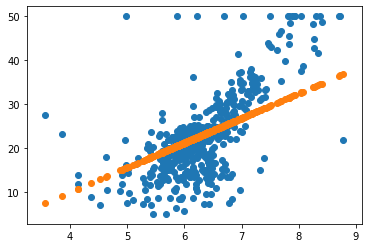

In [27]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## Supervised Learning

## 我们把房价的预测 变成更加负责，精细的模型，该怎么做？

$$ f(x) = k * x + b $$

$$ f(x) = k2 * \sigma(k_1 * x + b_1) + b2 $$

$$ \sigma(x) = \frac{1}{1 + e^(-x)} $$ 

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

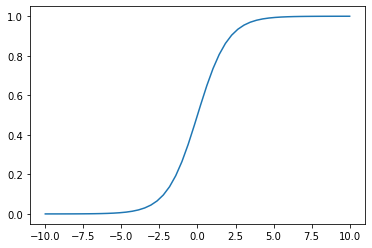

In [29]:
sub_x = np.linspace(-10, 10)
plt.plot(sub_x, sigmoid(sub_x))

In [30]:
def random_linear(x):
    k, b = random.random(), random.random()
    return k * x + b

In [31]:
def complex_function(x):
    return (random_linear(x))

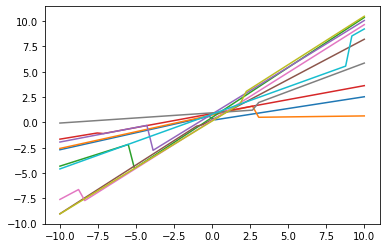

In [32]:
for _ in range(10):
    index = random.randrange(0, len(sub_x))
    sub_x_1, sub_x_2 = sub_x[:index], sub_x[index:]
    new_y = np.concatenate((complex_function(sub_x_1), complex_function(sub_x_2)))
    plt.plot(sub_x, new_y)

## 我们可以通过简单的、基本的模块，经过反复的叠加，来实现更加复杂的函数

## 面向越来越越复杂的函数？计算机如何求导？

## 1. 什么是机器学习？
## 2. KNN这种方法的缺陷，提出线性拟合的背景是什么
## 3. 怎么样通过监督的方法，来获得更快的函数权值更新
## 4. 非线性函数和线性函数的结合，可以拟合出非常复杂的函数
## 5. 深度学习我们可以通过基本的函数模块，来拟合更加复杂的函数

## Assigment:

$$ L2-Loss(y, \hat{y}) = \frac{1}{n}\sum{(\hat{y} - y)}^2 $$
$$ L1-Loss(y, \hat{y}) = \frac{1}{n}\sum{|(\hat{y} - y)|} $$


## 将课堂代码中的L2-Loss 变成L1Loss 并且实现梯度下降